In [1]:
import numpy as np
import pandas as pd
import csv
from utils import *
%load_ext autoreload
%autoreload 2
from algorithms import *
%load_ext autoreload
%autoreload 2
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# donwload dataset
import csv
with open('TSPD.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile, delimiter=';'))
    for item in range(len(data)):
        i = data[item]
        data[item] = [int(i[0]),int(i[1]),int(i[2])]
# fake_dataset = [[0,i, i] for i in range(1,6)]
# data = fake_dataset
NR_NODES = len(data)
HALF_NODES = int(len(data)/2)
print(data)
print(NR_NODES)

[[2907, 1115, 464], [3433, 183, 932], [2237, 74, 130], [91, 583, 503], [3053, 1867, 496], [2698, 436, 283], [1940, 1520, 735], [1251, 807, 893], [1415, 700, 128], [472, 498, 979], [1537, 1883, 759], [2839, 370, 754], [1083, 1307, 27], [702, 196, 680], [1393, 917, 523], [2901, 1231, 978], [1650, 1001, 65], [2111, 323, 785], [1596, 1302, 48], [2260, 1365, 382], [1427, 425, 871], [603, 513, 421], [1967, 1119, 827], [3781, 1575, 818], [3506, 628, 263], [3877, 1877, 102], [3019, 651, 468], [3070, 845, 868], [415, 1327, 577], [1782, 1395, 397], [1470, 76, 881], [3361, 93, 210], [1275, 65, 513], [1879, 1535, 347], [3019, 396, 142], [111, 1959, 973], [3818, 1948, 163], [3441, 1571, 322], [3882, 128, 122], [18, 481, 996], [1610, 511, 488], [3355, 1511, 863], [3613, 56, 599], [3408, 1072, 594], [520, 950, 44], [48, 791, 582], [2654, 1329, 755], [1047, 1727, 522], [1865, 88, 822], [3670, 1131, 786], [3577, 937, 223], [76, 89, 219], [1361, 1158, 253], [965, 239, 372], [2286, 474, 898], [3097, 1853

In [3]:
#structure 
distance_matrix, cost_list = get_dist_matrix_and_cost(data)
# cost_list = np.zeros(cost_list.shape)
distance_matrix[:5,:5]

array([[  inf, 1070., 1237., 2865.,  766.],
       [1070.,   inf, 1200., 3365., 1726.],
       [1237., 1200.,   inf, 2205., 1969.],
       [2865., 3365., 2205.,   inf, 3228.],
       [ 766., 1726., 1969., 3228.,   inf]])

233654.0


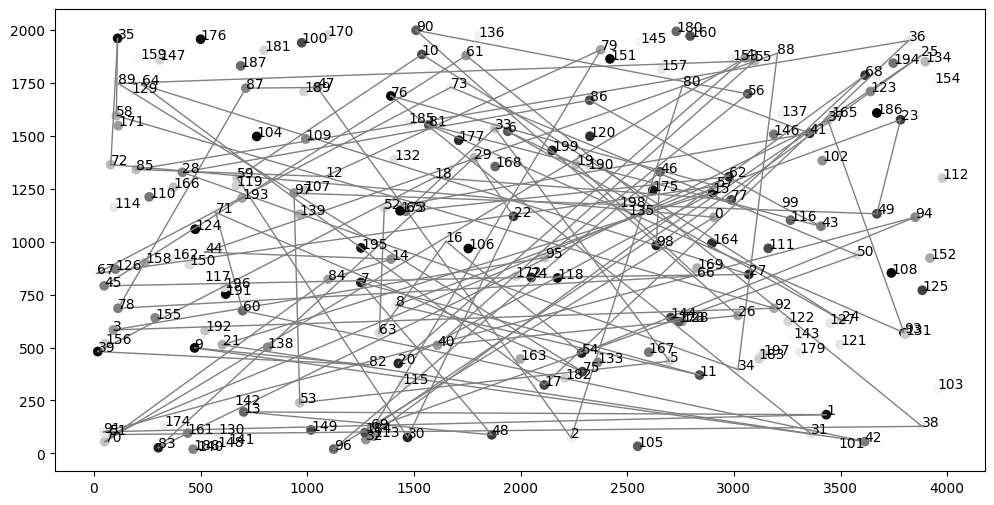

In [4]:
random_indexes = list(x for x in range(NR_NODES))[:HALF_NODES]
random.shuffle(random_indexes)
edges, total_cost = Random(cost_list, distance_matrix,random_indexes)
print(total_cost)
plotMap(data, edges)


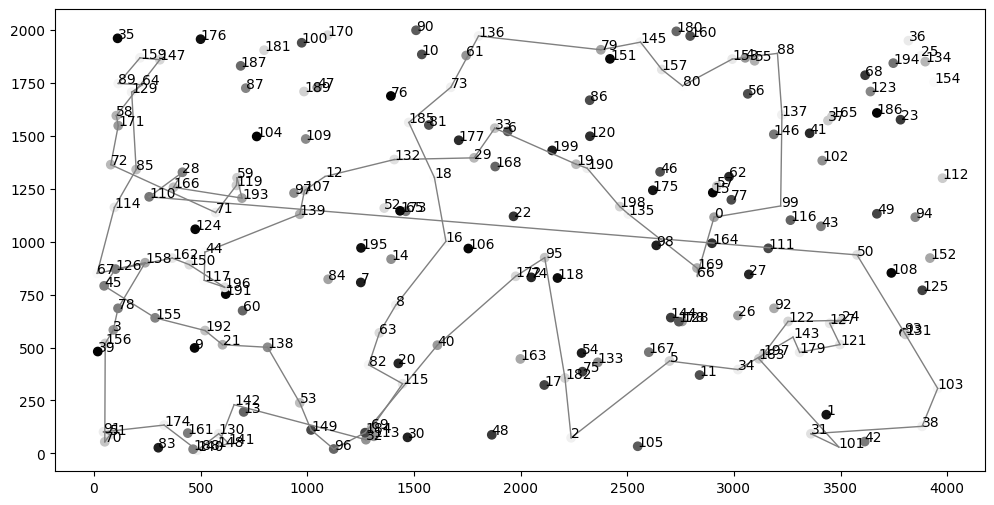

52875.0


In [5]:
# KNN
cost, edges = KNN(distance_matrix, cost_list, NR_NODES, HALF_NODES, 0)
plotMap(data, edges)
print(cost)


57509.0


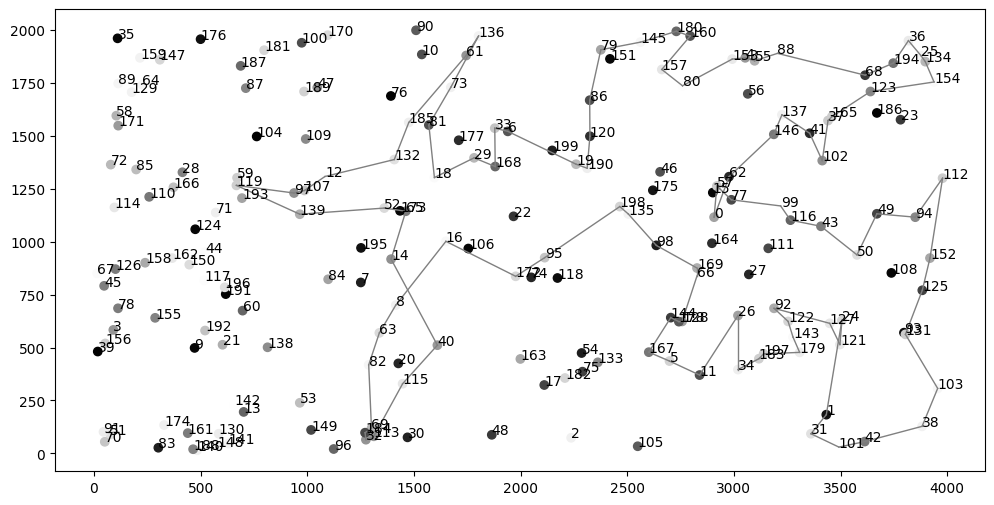

In [6]:
cost, edges = greedy_cycle(distance_matrix,cost_list,NR_NODES, HALF_NODES, 0)
print(cost)
plotMap(data, edges)


In [7]:
def gen_random_indices_list(max_ind, length):
    random_indexes = list(x for x in range(max_ind))[:length]
    random.shuffle(random_indexes)
    return random_indexes

def random_solution(distance_matrix,cost_list,NR_NODES, HALF_NODES, i):
    lista = gen_random_indices_list(NR_NODES-1, HALF_NODES)
    edges, cost = Random(cost_list, distance_matrix, lista)
    return cost, edges



FOR NN
MIN:  49418.0
MAX:  58965.0
AVG:  53368.68
STD:  1173.7222148362023


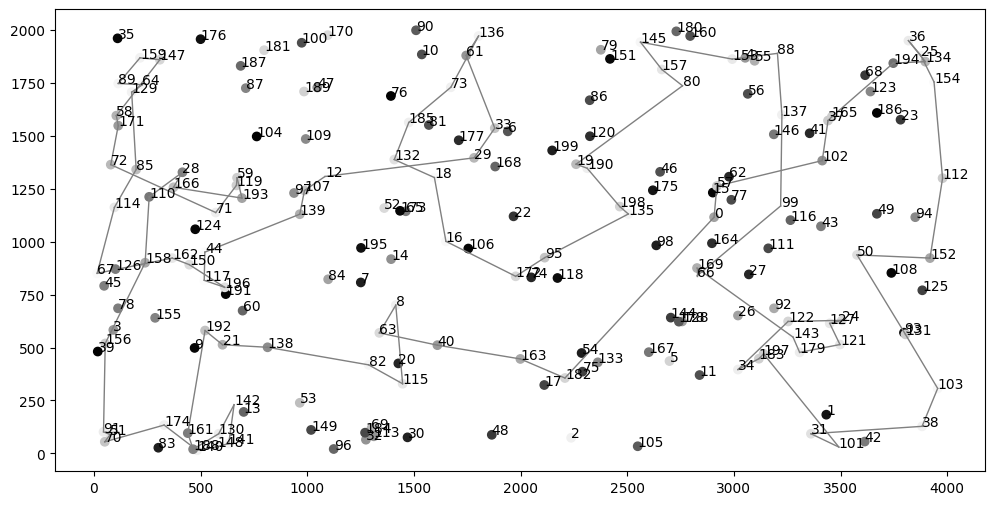

[[95, 172], [172, 16], [16, 18], [18, 132], [132, 185], [185, 73], [73, 136], [95, 135], [135, 198], [198, 190], [190, 19], [136, 61], [19, 80], [80, 157], [157, 145], [145, 153], [153, 88], [88, 137], [137, 99], [99, 66], [66, 169], [169, 143], [143, 179], [179, 121], [121, 127], [127, 24], [24, 122], [122, 34], [34, 183], [183, 197], [197, 101], [101, 31], [31, 38], [38, 103], [103, 131], [131, 50], [61, 33], [33, 29], [29, 12], [12, 107], [107, 139], [139, 44], [44, 117], [117, 196], [196, 150], [150, 162], [162, 67], [67, 114], [114, 85], [85, 129], [129, 64], [64, 89], [89, 159], [159, 147], [147, 58], [58, 171], [171, 72], [72, 71], [71, 119], [119, 59], [59, 193], [193, 166], [166, 28], [50, 152], [152, 112], [112, 154], [154, 25], [25, 36], [36, 134], [134, 194], [194, 165], [165, 37], [37, 102], [28, 110], [110, 158], [158, 156], [156, 91], [91, 51], [51, 70], [70, 174], [174, 140], [140, 148], [148, 141], [141, 142], [142, 130], [130, 188], [188, 161], [102, 57], [57, 0], [16

In [8]:
# # START FROM EVERY NODE
# print("*"*10,"EXPERIMENT: CONSECUTIVE START FROM EVERY NODE", "*"*10)

every_node_list = list(range(NR_NODES))

# result_every_random, best_every_random,best_ind_every_random =  repeat(random_solution, every_node_list , distance_matrix, cost_list, NR_NODES, HALF_NODES)
# print("\nFOR Random")
# present_statistic(result_every_random)
# plotMap(data, best_every_random)

result_every_NN, best_every_NN,best_ind_every_NN =  repeat(KNN,every_node_list , distance_matrix, cost_list, NR_NODES, HALF_NODES)
print("\nFOR NN")
present_statistic(result_every_NN)
plotMap(data, best_every_NN)
print(best_every_NN)
# result_every_greedy_cycle, best_every_greedy_cycle,best_ind_every_greedy_cycle =  repeat(greedy_cycle,every_node_list , distance_matrix, cost_list, NR_NODES, HALF_NODES)
# print("\nFOR GREEDY CYCLE")
# present_statistic(result_every_greedy_cycle)
# plotMap(data,best_every_greedy_cycle)


********** EXPERIMENT: START FROM RANDOM NODE **********

FOR Random
MIN:  197566.0
MAX:  246956.0
AVG:  218025.57
STD:  8839.505798691463


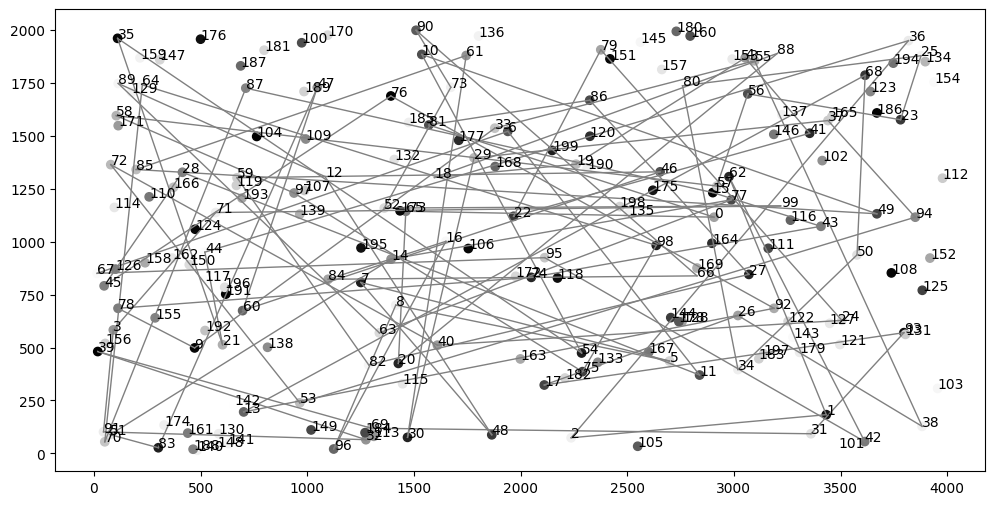


FOR NN
MIN:  49418.0
MAX:  58410.0
AVG:  53259.62
STD:  1156.2693352329293


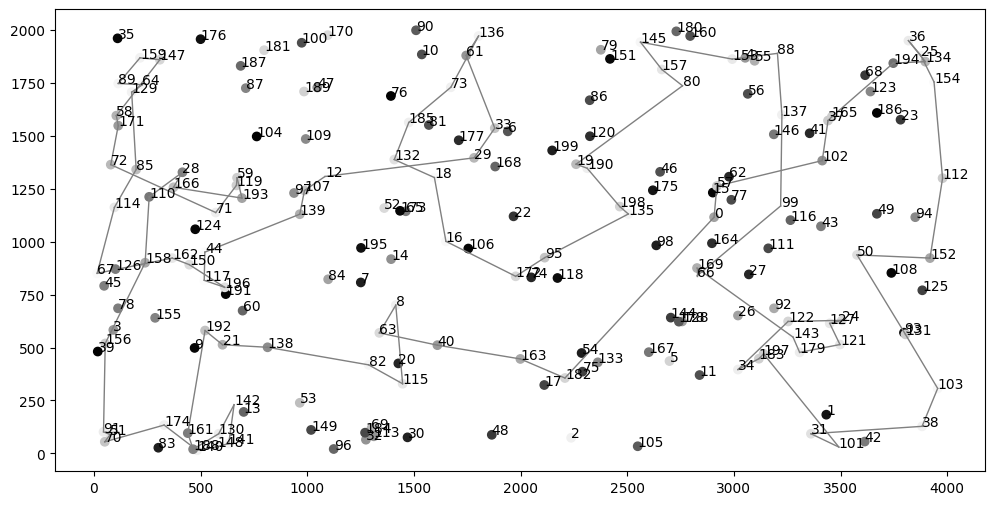


FOR GREEDY CYCLE
MIN:  50189.0
MAX:  59952.0
AVG:  54606.35
STD:  2877.828095543582


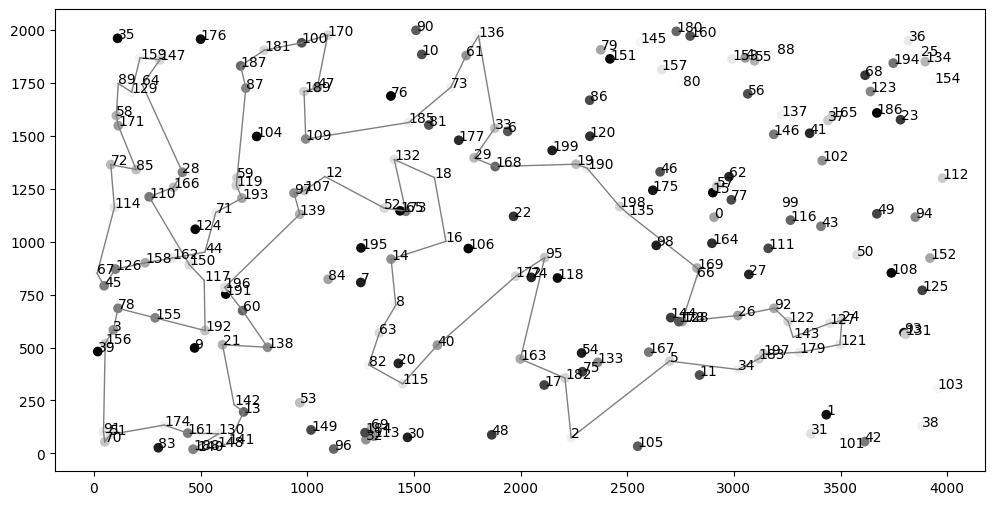

In [9]:
# FOR RANDOM 100
print("*"*10,"EXPERIMENT: START FROM RANDOM NODE", "*"*10)

random_list = [random.randint(0,NR_NODES-1) for i in range(100)]

result_random_random, best_random_random,best_ind_random_random =  repeat(random_solution, random_list , distance_matrix, cost_list, NR_NODES, HALF_NODES)
print("\nFOR Random")
present_statistic(result_random_random)
plotMap(data, best_random_random)

result_random_NN, best_random_NN,best_ind_random_NN =  repeat(KNN,random_list , distance_matrix, cost_list, NR_NODES, HALF_NODES)
print("\nFOR NN")
present_statistic(result_random_NN)
plotMap(data, best_random_NN)


result_random_greedy_cycle, best_random_greedy_cycle,best_ind_every_greedy_cycle =  repeat(greedy_cycle, random_list , distance_matrix, cost_list, NR_NODES, HALF_NODES)
print("\nFOR GREEDY CYCLE")
present_statistic(result_random_greedy_cycle)
plotMap(data,best_random_greedy_cycle)